### United Nations Millennium Development Goals
We will use the data from this competition https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

1. Load the data from the competition, removing any possible meaningless column.
2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?
3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.
4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.
5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.
6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.
7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.


Questions 1 to 6 are worth 0.5 points each, question 7 is totally open (no correct answers) and is worth 2 points, which will include overall presentation and aesthetics. 

#### 1. Load the data from the competition, removing any possible meaningless column.

In [2]:
#the data is loaded using pandas and the meaningless extra index column is removed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\user\\Documents\\Work\\United_Nations_Millennium_Development_Goals_-_Training_Data\\data\\TrainingSet.csv",
                index_col = 0)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214e+00,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746e+00,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.244887e+00,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293310e+01,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899681e+01,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.242306e+01,Afghanistan,allsa.gen_pop,(%) Generosity of All Social Safety Nets
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.205600e-01,Afghanistan,allsi.cov_pop,(%) Program participation - All Social Insurance
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.496313e+01,Afghanistan,allsp.cov_pop,(%) Program participation - All Social Protection
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.451376e+01,Afghanistan,allsa.cov_pop,(%) Program participation - All Social Safety ...
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,Afghanistan,lm_ub.cov_pop,(%) Program participation - Unemp benefits and...


In [5]:
cols = ['1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983',
        '1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995',
        '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007',
        'Country Name','Series Code','Series Name']
df.columns = cols + df.columns.tolist()[len(cols):]
df

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214e+00,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746e+00,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.244887e+00,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.293310e+01,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899681e+01,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.242306e+01,Afghanistan,allsa.gen_pop,(%) Generosity of All Social Safety Nets
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.205600e-01,Afghanistan,allsi.cov_pop,(%) Program participation - All Social Insurance
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.496313e+01,Afghanistan,allsp.cov_pop,(%) Program participation - All Social Protection
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.451376e+01,Afghanistan,allsa.cov_pop,(%) Program participation - All Social Safety ...
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,Afghanistan,lm_ub.cov_pop,(%) Program participation - Unemp benefits and...


#### 2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [6]:
df['Series Code'].str.split('.', expand = True)[0].nunique()

62

#### 3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

In [7]:
#the dataframe is transformed using the melt function. Due to a longer processing time this is done outside of the functions.
melted_df = df.melt( id_vars=['Series Code', "Series Name", "Country Name"], var_name='Year')
melted_df["Year"] = melted_df["Year"].str.split(" ", expand = True)[0]
melted_df = melted_df.set_index("Year")
#the output is a dataframe with the years as the index and all other information as columns.

In [8]:
melted_df

,Series Code,Series Name,Country Name,value
Year,,,,
1972,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,NaN
1972,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,NaN
1972,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...,Afghanistan,NaN
1972,allsi.gen_pop,(%) Generosity of All Social Insurance,Afghanistan,NaN
1972,allsp.gen_pop,(%) Generosity of All Social Protection,Afghanistan,NaN
1972,allsa.gen_pop,(%) Generosity of All Social Safety Nets,Afghanistan,NaN
1972,allsi.cov_pop,(%) Program participation - All Social Insurance,Afghanistan,NaN
1972,allsp.cov_pop,(%) Program participation - All Social Protection,Afghanistan,NaN
1972,allsa.cov_pop,(%) Program participation - All Social Safety ...,Afghanistan,NaN


In [9]:
# the input is a country string and the output is the printed country string and a dataframe showing only this countries data, without the country name column.
def countryselect (countryname):

    country_df = melted_df.loc[melted_df["Country Name"] == countryname].drop(columns = ["Country Name"])
    
    print (countryname)
    return country_df

In [10]:
countryselect("Afghanistan")

Afghanistan


,Series Code,Series Name,value
Year,,,
1972,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...,NaN
1972,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...,NaN
1972,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...,NaN
1972,allsi.gen_pop,(%) Generosity of All Social Insurance,NaN
1972,allsp.gen_pop,(%) Generosity of All Social Protection,NaN
1972,allsa.gen_pop,(%) Generosity of All Social Safety Nets,NaN
1972,allsi.cov_pop,(%) Program participation - All Social Insurance,NaN
1972,allsp.cov_pop,(%) Program participation - All Social Protection,NaN
1972,allsa.cov_pop,(%) Program participation - All Social Safety ...,NaN


In [11]:
# the input is a Series string and the output is the printed series string and a dataframe showing this series Year, Country and Value of the given series.
def seriesselect (seriesname):

    series_df = melted_df.loc[melted_df["Series Name"] == seriesname].drop(columns = ["Series Name", "Series Code"])
    
    print (seriesname)
    return series_df

In [12]:
seriesselect("(%) Generosity of All Social Safety Nets")

(%) Generosity of All Social Safety Nets


,Country Name,value
Year,,
1972,Afghanistan,NaN
1972,Bangladesh,NaN
1972,Bhutan,NaN
1972,Bolivia,NaN
1972,Bosnia and Herzegovina,NaN
1972,Bulgaria,NaN
1972,Chile,NaN
1972,Dominican Republic,NaN
1972,El Salvador,NaN


#### 4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

In [13]:
# a dataframe with with only the given series is selected and then further divided into responses from each country.
# later a mean dataframe of the the 3 countries is produced and a 3 year centered rolling average is applied on it.
energy = seriesselect("Alternative and nuclear energy (% of total energy use)")
germany = energy.loc[energy["Country Name"] == "Germany"].drop(columns = ["Country Name"])
india = energy.loc[energy["Country Name"] == "India"].drop(columns = ["Country Name"])
uk = energy.loc[energy["Country Name"] == "United Kingdom"].drop(columns = ["Country Name"])
mean = ((germany + india + uk)/3).rolling(3, center = True).mean()


Alternative and nuclear energy (% of total energy use)


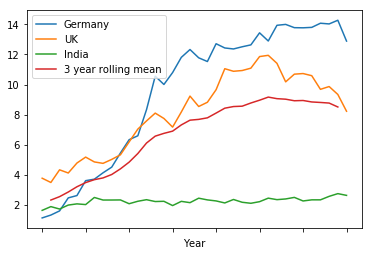

In [14]:
#then everything is plotted in a graph and labeled for comprehension
#run this twice for the plot to show up
ax = germany.plot()
uk.plot(ax=ax)
india.plot(ax=ax)
mean.plot(ax=ax)

ax.legend(labels = ["Germany", "UK", "India", "3 year rolling mean"]);

#### 5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In [15]:
big_coal = seriesselect("Electricity production from coal sources (kWh)")
big_coal

Electricity production from coal sources (kWh)


,Country Name,value
Year,,
1972,Albania,NaN
1972,Algeria,NaN
1972,Angola,NaN
1972,Argentina,6.150000e+08
1972,Armenia,NaN
1972,Australia,3.997900e+10
1972,Austria,3.337000e+09
1972,Azerbaijan,NaN
1972,Bahrain,NaN


In [16]:
big_coal.groupby('Country Name').sum().nlargest(8,'value')

,value
Country Name,
United States,5.739054e+13
China,2.434389e+13
Germany,1.077732e+13
India,7.919573e+12
United Kingdom,6.004158e+12
South Africa,5.355493e+12
Japan,5.076713e+12
Poland,4.471038e+12


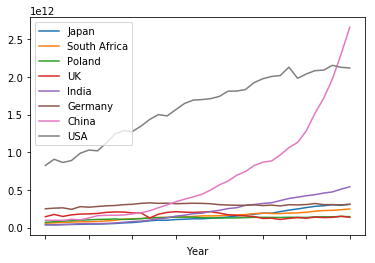

In [53]:
big_coal = melted_df.loc[melted_df["Series Name"] == "Electricity production from coal sources (kWh)"]
United_States = big_coal.loc[big_coal['Country Name'] == 'United States'].drop(columns = ["Series Code", "Series Name", "Country Name"])
China = big_coal.loc[big_coal['Country Name'] == 'China'].drop(columns = ["Series Code", "Series Name", "Country Name"])
Deutschland = big_coal.loc[big_coal['Country Name'] == 'Germany'].drop(columns = ["Series Code", "Series Name", "Country Name"])
India = big_coal.loc[big_coal['Country Name'] == 'India'].drop(columns = ["Series Code", "Series Name", "Country Name"])
United_Kingdom = big_coal.loc[big_coal['Country Name'] == 'United Kingdom'].drop(columns = ["Series Code", "Series Name", "Country Name"])
Poland = big_coal.loc[big_coal['Country Name'] == 'Poland'].drop(columns = ["Series Code", "Series Name", "Country Name"])
South_Africa = big_coal.loc[big_coal['Country Name'] == 'South Africa'].drop(columns = ["Series Code", "Series Name", "Country Name"])
Japan = big_coal.loc[big_coal['Country Name'] == 'Japan'].drop(columns = ["Series Code", "Series Name", "Country Name"])

c_list = [South_Africa, Poland, United_Kingdom, India, Deutschland, China, United_States]
ax = Japan.plot()
for c in c_list:
    c.plot(ax=ax)
ax.plot()
   
ax.legend(labels=['Japan', 'South Africa', 'Poland', 'UK', 'India', 'Germany', 'China', 'USA']);

#### 6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

In [18]:
years = [2002, 2003, 2004, 2005, 2006, 2007]
big_coal.loc[].groupby('Country Name').mean().nlargest(n=8, columns='value')
#series_df = melted_df.loc[melted_df["Series Name"] == seriesname].drop(columns = ["Series Name", "Series Code"])

SyntaxError: invalid syntax (<ipython-input-18-02c55f97ccbf>, line 2)

In [6]:
df_percent = df.loc[df['Series Name']== "Electricity production from coal sources (kWh)"].drop(columns=['Series Name']).set_index(['Country Name']).T
df_percent.index.name = 'Year'

In [7]:
df_percent = df_percent.loc[:, (df_percent != 0).all(axis=0)]

In [8]:
df_percent.loc["Growth during last 5 years"] = ((df_percent.loc["2007"] - df_percent.loc["2003"])/ df_percent.loc["2003"])


In [9]:
df_percent = df_percent.T

In [10]:
df_percent["Growth during last 5 years"] = pd.to_numeric(df_percent["Growth during last 5 years"])
df_percent = df_percent.nlargest(8, columns='Growth during last 5 years', keep='first').T.head(36)
df_percent

Country Name,Chile,Argentina,Vietnam,China,Turkey,Thailand,Kosovo,"Korea, Rep."
Year,,,,,,,,
1972,8.54e+08,6.15e+08,1.778e+09,9.7753e+10,2.921e+09,2.68e+08,NaN,8.12e+08
1973,1.227e+09,6.31e+08,1.93e+09,9.7713e+10,3.244e+09,2.44e+08,NaN,1.341e+09
1974,1.061e+09,6.78e+08,1.65e+09,9.6845e+10,3.871e+09,3.45e+08,NaN,7.43e+08
1975,8.02e+08,6.5e+08,1.928e+09,1.10665e+11,4.113e+09,3.42e+08,NaN,1.312e+09
1976,9.89e+08,6.27e+08,2.4e+09,1.0436e+11,4.327e+09,3.87e+08,NaN,1.475e+09
1977,1.06e+09,5.35e+08,2.873e+09,1.28181e+11,4.892e+09,3.45e+08,NaN,1.39e+09
1978,1.201e+09,7.56e+08,2.8e+09,1.58652e+11,5.569e+09,4.89e+08,NaN,9.29e+08
1979,1.615e+09,6.8e+08,2.6e+09,1.63493e+11,6.438e+09,1.273e+09,NaN,1.252e+09
1980,1.89e+09,8.19e+08,1.421e+09,1.64149e+11,5.96e+09,1.41e+09,NaN,2.481e+09


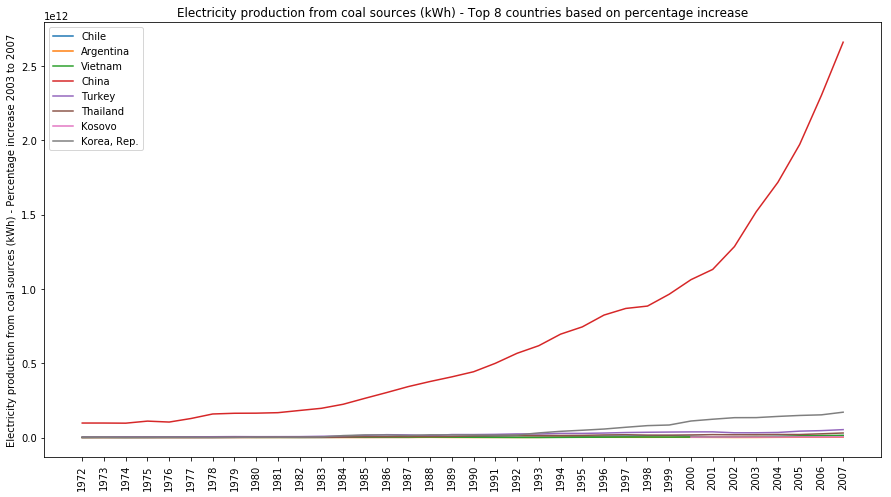

In [11]:
plt.figure(figsize=(15,8))
plt.ylabel('Electricity production from coal sources (kWh) - Percentage increase 2003 to 2007')
plt.title('Electricity production from coal sources (kWh) - Top 8 countries based on percentage increase')

list_a = list(df_percent.columns.values)
plt.plot(df_percent)
plt.legend(list_a, loc='upper left')
plt.xticks(rotation="vertical");

#### 7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

In [ ]:
#First we represent World Development in general terms. Annual GDP growth is a good example of overall economic improvement:

In [19]:
GDP_growth = seriesselect('GDP growth (annual %)').groupby('Country Name').sum()
len(GDP_growth['value'])

GDP growth (annual %)


204

In [20]:
negative_gdp_values = 0
for x in GDP_growth['value']:
    if x < 0:
        negative_gdp_values += 1

In [21]:
negative_gdp_values

5

In [22]:
positive_gdp_values = 0
for x in GDP_growth['value']:
    if x > 0:
        positive_gdp_values += 1

In [23]:
positive_gdp_values

199

In [ ]:
# As can be seen below, the vast majority of countries have shown net positive GDP growth

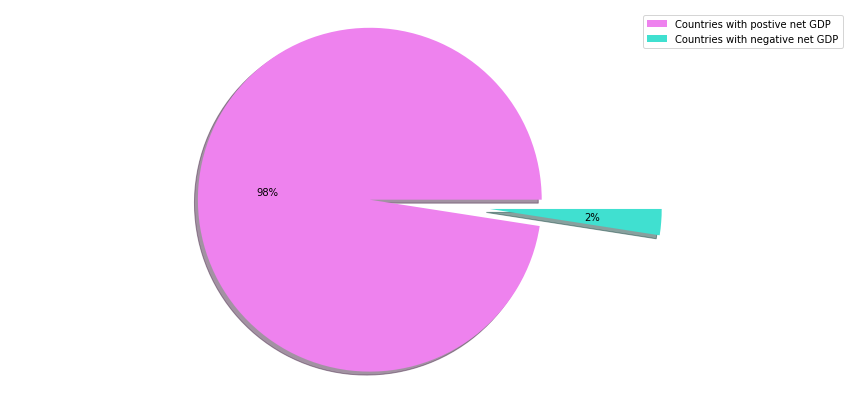

In [46]:
a = [positive_gdp_values, negative_gdp_values]
b = ['Countries with postive net GDP', 'Countries with negative net GDP']
plt.subplots(figsize=(15,7))
plt.pie(a, autopct='%1.0f%%', explode=(0.7, 0), colors=['violet','turquoise'], shadow=True)
plt.legend(b, loc="upper right")
plt.axis('equal');

In [ ]:
# Only 2% of Countries have a negative net GDP. That's 5 countries. Let's see which ones:

In [ ]:
# These are countries that have experienced turbulant histories. Three are former Soviet countries, D.R Congo has faced near 
# constant conflict. Serbia also experienced war in recent times.  

In [25]:
GDP_growth.loc[GDP_growth['value'] < 0]

,value
Country Name,
"Congo, Dem. Rep.",-15.644938
Moldova,-19.857130
Serbia,-18.314973
Tajikistan,-11.000001
Ukraine,-22.775463


In [ ]:
# Overall we can conclude that GDP growth has been overwhelmingly positive on a global scale.

In [ ]:
# Let's take a look at Health. Again, we see a very positive increase in terms of Life Expectancy 

Life expectancy at birth, total (years)


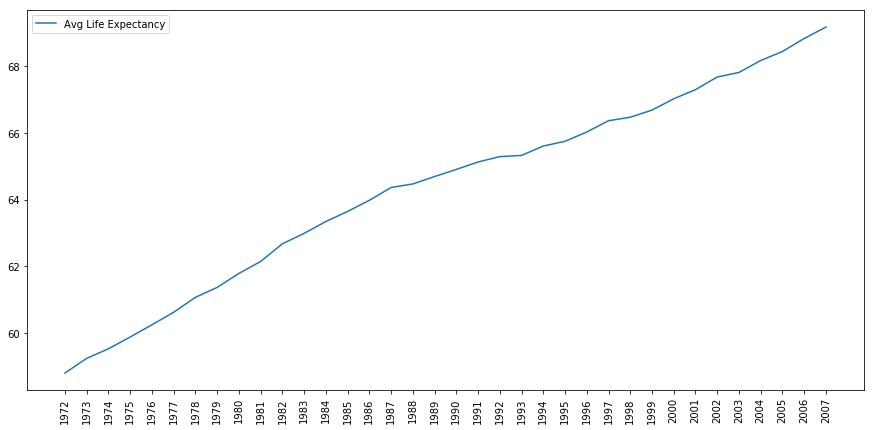

In [62]:
plt.subplots(figsize=(15,7))
health = seriesselect("Life expectancy at birth, total (years)").groupby(["Year"]).mean()
plt.plot(health.index, health["value"])
plt.xticks(rotation="vertical");
plt.legend(labels = ["Avg Life Expectancy"]);

In [ ]:
# Now to consider Environmental change. Another factor which is widely relevant. We will consider CO2 emmisions (kt)

In [37]:
CO2 = seriesselect('CO2 emissions (kt)').groupby(['Year']).sum()

CO2 emissions (kt)


In [38]:
CO2.head()

,value
Year,
1972,1.157133e+07
1973,1.222255e+07
1974,1.209923e+07
1975,1.201346e+07
1976,1.267864e+07


In [ ]:
# As we know, global emmissions have seen a constant increase. This represents one of the greatest existential threats to
# humanity. This is indeed a cause for concern, the situation has shown no sign of improving. 

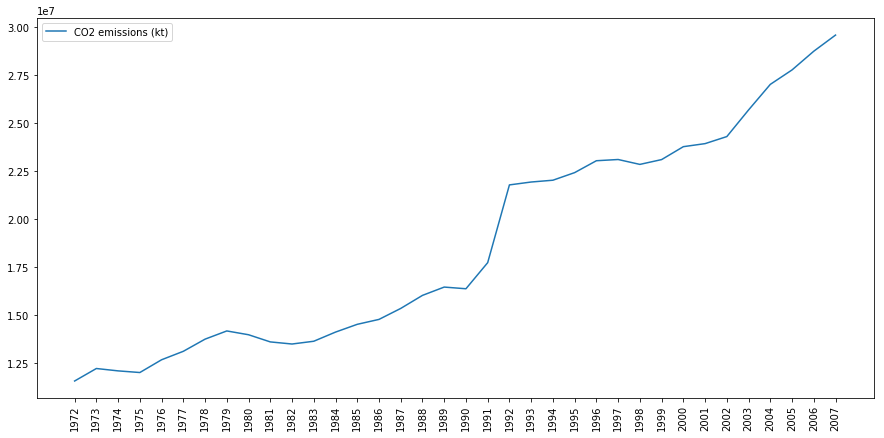

In [45]:
plt.subplots(figsize=(15,7))
plt.xticks(rotation="vertical")
plt.plot(CO2.index, CO2['value'])
plt.legend(labels = ['CO2 emissions (kt)']);

In [ ]:
# Now consider education. Let's see how many children are receiving some kind of education. The obvious metric for this
# is the enrollment in primary education. 

School enrollment, primary (% net)


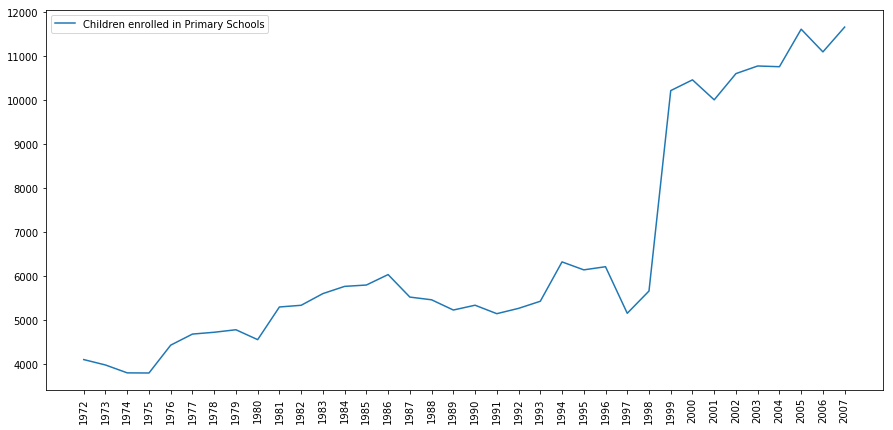

In [35]:
Primary_enrollment = seriesselect('School enrollment, primary (% net)').groupby(['Year']).sum()
plt.subplots(figsize=(15,7))
plt.xticks(rotation="vertical")
plt.plot(Primary_enrollment.index, Primary_enrollment['value'])
plt.legend(labels = ["Children enrolled in Primary Schools"]);

In [ ]:
# The trend in this case has been overwhelmingly positive. A great increase of humans are receiving some kind of Education.

In [ ]:
# So having briefly considered Health, Economic growth, Environment and Education we can see that there has been great 
# improvement, but for in environmental terms, where the situation is getting worse.

In [ ]:
# Now we'll consider some correlations. 
# Firstly we'll consider whether there is a high correlation between the general growth in world GDP and Primary School 
#enrollment

In [36]:
GDP = seriesselect('GDP growth (annual %)').groupby(['Year']).mean()
GDP['Primary_enrollment'] = seriesselect('School enrollment, primary (% net)').groupby(['Year']).mean()
GDP.head()

GDP growth (annual %)
School enrollment, primary (% net)


,value,Primary_enrollment
Year,,
1972,5.765554,75.993229
1973,4.839515,73.717331
1974,5.433987,76.034575
1975,2.960552,79.137924
1976,5.942696,82.068838


In [ ]:
# Although it would make causative sense that the two are related, the correlation is quite weak. 
# Of course, these are large scale trends. Many other factors are clearly at play.

In [59]:
GDP['value'].corr(GDP['Primary_enrollment']) 

0.12281219365290061

In [ ]:
# Let's zoom in a bit. Given that GDP growth is so unspecific, perhaps there will be a stronger correlation between Primary
# School enrollment and % GDP spend on Education.

In [68]:
Primary_enrollment["% GDP on Education"] = seriesselect("Public spending on education, total (% of GDP)").groupby(["Year"]).mean()
school_funding_corr = Primary_enrollment["% GDP on Education"].corr(Primary_enrollment["value"])
school_funding_corr

Public spending on education, total (% of GDP)


0.631919985928149

In [ ]:
# There is indeed a notable correlation here

In [ ]:
# Let's correlate another couple of trends. Here we look at the relationship between life expectancy and CO2 emissions

In [66]:
health["CO2"] = seriesselect("CO2 emissions (kt)").groupby(["Year"]).mean()
health_environment_corr = health["CO2"].corr(health["value"])
health_environment_corr

CO2 emissions (kt)


0.9567927729755683

In [ ]:
# Here we see an incredibly high correlation! The data tells us that as the Environment worsens, our health improves!
# Naturally this is where we must be wary. This is not causative, as far as our current scientific knowledge would have
# us believe !

In [ ]:
# Clearly single trends have to be investigated thoroughly in order to gain any greater knowledge of their causes. 

In [ ]:
# Overall we can say that global trends are far more positive than is often recognised. 